# Introduction

Cet examen se base sur les données météo france de 2018

# Import des modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Lecture du fichier (1 pt)
Lire le fichier datas.csv dans un DataFrame df

In [2]:
df=pd.read_csv('meteo.csv')


# Aperçu du tableau (1 pt)
Afficher les 10 première lignes du DataFrame

In [3]:
df.head(10)

,Nom,Date,Température,Pression au niveau mer,Humidité
0,TROYES-BARBEREY,2018-08-08,295.5750,101367.50,67.375
1,ROUEN-BOOS,2018-08-08,292.4250,101316.25,69.250
2,ORLY,2018-08-08,295.9250,101295.00,57.750
3,BALE-MULHOUSE,2018-08-08,298.1875,101310.00,61.250
4,TOULOUSE-BLAGNAC,2018-08-08,297.9750,101370.00,65.375
5,LA DESIRADE METEO,2018-08-08,302.1000,101712.50,72.000
6,TOURS,2018-08-08,294.7875,101375.00,62.000
7,GOURDON,2018-08-08,296.7625,101385.00,62.500
8,LE RAIZET AERO,2018-08-08,300.7125,101742.50,77.500
9,NANTES-BOUGUENAIS,2018-08-08,293.7500,101370.00,70.625


# Nombre de Colonnes (1 pt)
Afficher le nombre de colonnes dans le DataFrame

In [4]:
df.shape[1]

5

# Nombre de lignes (1 pt)
Afficher le nombre de lignes dans le DataFrame

In [5]:
df.shape[0]

19545

# Données manquantes (1 pt)
Afficher le nombre données manquantes par colonne

In [6]:
df.isnull().sum()

Nom                         0
Date                        0
Température                76
Pression au niveau mer    929
Humidité                  176
dtype: int64

# Suppression des manquants (1 pt)
Supprimer les lignes contenant des données manquantes

In [7]:
df.dropna(axis=0,how='any',inplace=True)
df.shape

(18616, 5)

# Tri par nom et par date (2 pts)
Trier le DataFrame par nom et par date

In [8]:
df.sort_values(axis=0,by=['Nom','Date'],inplace=True)
df.head()

,Nom,Date,Température,Pression au niveau mer,Humidité
2116,ABBEVILLE,2018-01-01,280.2625,100145.00,82.00
1064,ABBEVILLE,2018-01-02,277.8375,100348.75,77.00
1799,ABBEVILLE,2018-01-03,270.7250,99900.00,58.25
6787,ABBEVILLE,2018-01-04,279.9125,101096.25,77.50
6188,ABBEVILLE,2018-01-05,281.8000,101203.75,75.50


# Passage en degrés Celsius (1 pt)
Transformer les températures en Kelvin en température en degrés Celsius

    pour rappel : T(K) = T(°C) + 273.15

In [9]:
df.Température = df.Température.apply(lambda x: x-273.15)
df.head()

,Nom,Date,Température,Pression au niveau mer,Humidité
2116,ABBEVILLE,2018-01-01,7.1125,100145.00,82.00
1064,ABBEVILLE,2018-01-02,4.6875,100348.75,77.00
1799,ABBEVILLE,2018-01-03,-2.4250,99900.00,58.25
6787,ABBEVILLE,2018-01-04,6.7625,101096.25,77.50
6188,ABBEVILLE,2018-01-05,8.6500,101203.75,75.50


# Création de l'indice THI (1 pt)
Créer une nouvelle colonne nommée THI (Temperature Humidity Index) calculée de la façon suivante :
    
    THI = T - ((0.55 - 0.0055*H) * (T - 14.5))
    avec T : Température en °C
    et H : Humidité relative en %

In [10]:
df['THI']=df.Température -((0.55-0.0055*df.Humidité)*(df.Température-14.5))
df.head()

,Nom,Date,Température,Pression au niveau mer,Humidité,THI
2116,ABBEVILLE,2018-01-01,7.1125,100145.00,82.00,7.843863
1064,ABBEVILLE,2018-01-02,4.6875,100348.75,77.00,5.928781
1799,ABBEVILLE,2018-01-03,-2.4250,99900.00,58.25,1.461403
6787,ABBEVILLE,2018-01-04,6.7625,101096.25,77.50,7.720016
6188,ABBEVILLE,2018-01-05,8.6500,101203.75,75.50,9.438288


# Température moyenne (2 pts)
Donner la température moyenne par ville

In [12]:
df.groupby(['Nom']).Température.mean().head()

Nom
ABBEVILLE        11.304258
AJACCIO          16.558680
ALENCON          11.457674
BALE-MULHOUSE    11.914379
BASTIA           16.537162
Name: Température, dtype: float64

# Nombre de jours plus chauds que la moyenne à Orly (3 pts)
Donner, pour Orly, le nombre de jours avec une température supérieure à la température moyenne d'Orly

In [40]:
moyenne_Orly=df.groupby(['Nom']).Température.mean().loc['ORLY']
moyenne_Orly

12.621875172034166

In [41]:
(df.loc[(df['Nom']=="ORLY") & (df['Température']>moyenne_Orly)]).shape[0]

166

# Visualisation (2 pts)
Tracer le boxplot des valeurs de température à Orly

TypeError: list indices must be integers or slices, not str

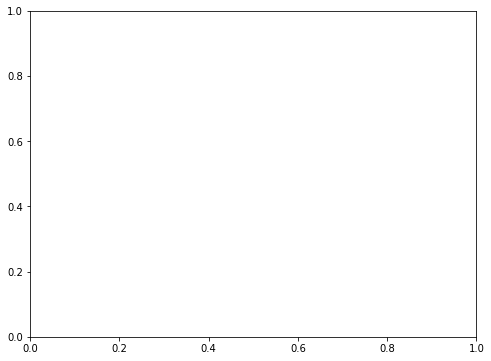

In [68]:
fig=plt.figure(figsize=(8,6))
ax1=fig.gca()
(df[['Température']['Nom']]).boxplot(ax=ax1)
plt.xlabel('Orly')
plt.ylabel('Température')
plt.title('valeurs de température à Orly')
plt.show()

# Classe (3 pts)
Créer une classe s'initialisant avec le DataFrame meteo.csv et proposant deux méthodes.
La première prend en argument un nom de ville et renvoie la température moyenne dans cette ville.
La seconde prend en argument une température et renvoie le nombre de villes pour lesquelles la température moyenne est supérieure à la température passée en argument de la méthode.

In [95]:
class Myclass():
    """ 
    """
    def __init__(self,df):
        self.df=df
    def first_meth(self,nom):
        """
        Retourne la température moyenne de la ville 'nom'

        Parameters:
        df (DataFrame): DataFrame des votes
        nom: nom de la ville à la quelle on souhaite connaitre la moyenne de la température

        Returns:
        float: température en celcius
        """
        self.nom=nom
        moyenne=self.df.groupby(['Nom']).Température.mean().loc[nom]
        return moyenne
    def second_meth(self,t):
         """
        Retourne la ville où la température moyenne est sup à t

        Parameters:
        df (DataFrame): DataFrame des votes
        t:température donnée

        Returns:
        string: nom des villes
        """
        
        self.t=t
        return (self.df['Température']>t).shape[0]
        for self.df.nom in df : 
            if first_meth(self.df.nom) > t : 
                return self.df.nom
        
    
        

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 32)

In [85]:
classe=Myclass(df)

In [90]:
classe.first_meth('ORLY')

12.621875172034166

In [93]:
classe.second_meth(40)

18616